# 1.1 PSS signals

In [1]:
import scipy.io
import numpy as np

In [2]:
# Load MATLAB file into Python
rxsignal_data = scipy.io.loadmat('data/rxsignal_withchannelandfreqoff.mat')

In [3]:
# Access variables in the MATLAB file
rxs3 = rxsignal_data['rxs3']


In [4]:
rxs3

array([[ -7.30420514+19.17827615j],
       [ -6.23556869-16.03725969j],
       [ -2.25855811 +2.89561884j],
       ...,
       [  1.98315756+11.29937947j],
       [-13.36641633 -2.18618519j],
       [  4.04883426+10.65421598j]])

/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


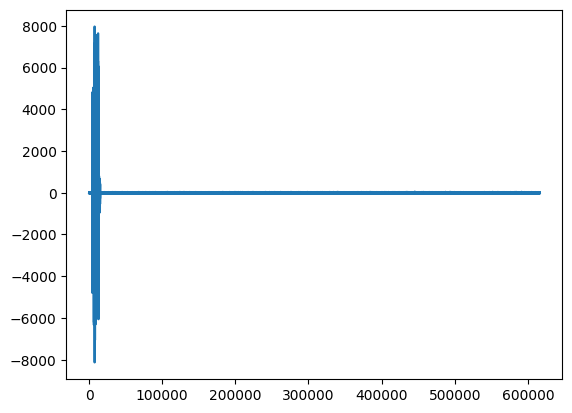

In [5]:
import matplotlib.pyplot as plt
plt.plot(rxs3)

In [6]:
import data.pss2
# Access the variable declared in the included file
pss_2 = data.pss2.pss_2

In [7]:
# Perform inverse Fourier transform (ifft) and transpose
pss2_t = np.fft.ifft(np.transpose(pss_2))

# Normalize the signal
pss2_t = pss2_t / np.linalg.norm(pss2_t)

# Slice and concatenate the signal
pss2_t = np.concatenate([pss2_t[-143:], pss2_t])

In [11]:
pss2_t_conjugate_flipped = np.conj(np.fliplr(np.array([pss2_t]))[0])

In [12]:
from scipy.signal import convolve

In [15]:
# Perform complex convolution
conv_result = np.convolve(rxs3.flatten(), pss2_t_conjugate_flipped)

In [16]:
# Calculate the magnitude of the convolution result
magnitude_result = np.abs(conv_result)

# Calculate the logarithm (base 10) of the magnitude
m2_chan = 10 * np.log10(magnitude_result)

In [17]:
m2_chan

array([-10.66372443, -10.47951978,  -8.33713368, ...,  -1.8100993 ,
        -4.19764536,  -4.78589225])